In [66]:
from __future__ import division   # fuerza aritmética no entera
from PIL import Image
import math
from sympy import *
from sympy.abc import i,k,r,b,h,H,x,y
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt   # funciones para representación gráfica
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
init_printing(use_latex=True)
%matplotlib inline

# Dínamica dependiente del tiempo
## La situación más general la encontramos cuando la tasa de crecimiento intrínseca, $r$, depende tanto del tiempo como de la población existente en cada instante. Típicamente, encontramos que al aumentar el número de individuos, x, también aumenta entre ellos la competencia por los recursos, por lo cual es de esperar que la tasa de natalidad, $n(t,x)$ disminuya, y la tasa de mortalidad, $m(t,x)$ aumente al aumentar la poblacion $x$:
## $\frac{\delta n(t,x)}{\delta x}<0$; $\frac{\delta m(t,x)}{\delta x}>0$
## Por lo tanto la ecuación logistica dependiente del tiempo se puede expresar como:
## $\frac{dx}{dt}=r(t)[1-\frac{x}{K}]x$

In [2]:
from sympy import *
k = symbols("k", positive=True)
t = symbols("t", real=True)
x = Function("x", real=True)
r = Function("r", real=True)
eq = x(t).diff(t) - r(t)*(1-x(t)/k)*x(t)
eq

## Para encontrar los puntos críticos de la ecuación se obtienen igualando $\frac{dx}{dt}=0$
## Lo cual se puede obtener: 
$r(t) (1-\frac{x}{K})x=0$

$r(t) x-\frac{x^2r(t)}{K}=0$

$\frac{x^2r(t)}{K} - xr(t) =0$

${x^2} - xK =0$

## Los puntos criticos $x_1$ y $x_2$ son:

$x_1 = \frac{K - \sqrt{ (K^2)}}{2} = 0 $; $x_2 = \frac{K + \sqrt{ (K^2 )}}{2} = k$
### Donde $k$ es la capacidad de soporte ambiental en el instante $t$. Para este analisis se tomara $k$ como una constante

In [3]:
eq1 =  r(t)*(1-x(t)/k)*x(t) 
sol1, sol2 = solve(eq1,x(t))
print "Solución 1 =",
sol1

Solución 1 =Solución 1 =

In [4]:
print "Solución 2 =", 
sol2

Solución 2 =


Solución 2 =

## La solución general al problema de poblaciones dependientes del tiempo es: 

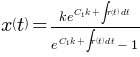

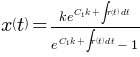

In [5]:
sol = dsolve(eq,x(t))
sol

# Con base en la ecuación $x(t)=\frac{ke^{(C_{1}k+\int r(t)dt)}}{e^{(C_{1}k + \int r(t)dt)}-1}$ realizamos un analisis de cuatro diferentes funciones ciclicas
## * $r(t)=sin(t)$
## * $r(t)=cos(t)$
## * $r(t)=\frac{sin(t)}{t}$
## * $r(t)=tcos(t) - t^2sin(t)$

## Iniciamos con  
### * $r(t)=sin(t)$

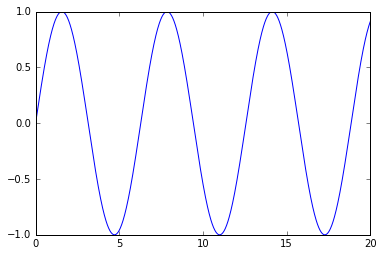

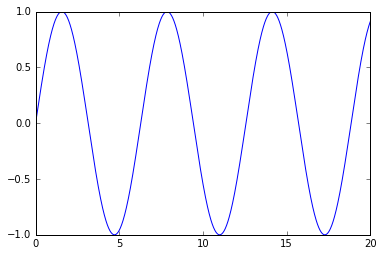

In [6]:
from sympy import *
t = symbols("t", real=True)
Sn = sin(t)
T = np.linspace(0, 20, 1000)
F = np.vectorize(lambda val: Sn.subs(t, val).evalf())
plt.plot(T, F(T))

In [7]:
from sympy import *
k = symbols("k", positive=True)
t = symbols("t", real=True)
x = Function("x", real=True)
r = Function("r", real=True)
eq = x(t).diff(t) - sin(t)*(1-x(t)/k)*x(t)
eq

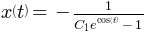

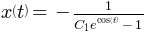

In [8]:
eq = eq.subs(k, 1)
sol = dsolve(eq,x(t))
sol

In [9]:
C1= symbols("C1")
const = solve([sol.rhs.subs(t,0) - 2], [C1])
print "Si k=1, entonces C1 es"
const

Si k=1, entonces C1 es
Si k=1, entonces C1 es


La ecuación final se puede definir como:
La ecuación final se puede definir como:


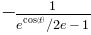

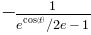

In [10]:
initvalue_solution = sol.rhs.subs(C1, const[C1])
print "La ecuación final se puede definir como:"
initvalue_solution

Analisis del comportamiento de población en un intervalo de 10 años
Analisis del comportamiento de población en un intervalo de 10 años


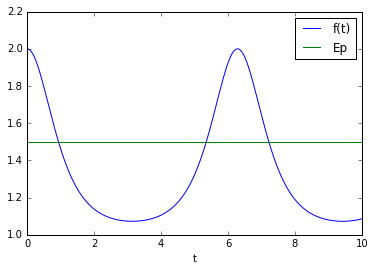

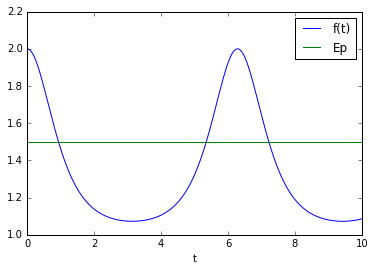

In [11]:
T = np.linspace(0, 10, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 10 años"

Analisis del comportamiento de población en un intervalo de 50 años
Analisis del comportamiento de población en un intervalo de 50 años


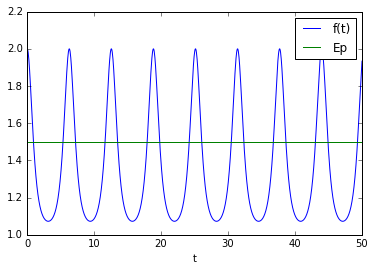

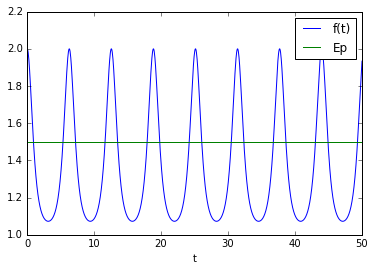

In [12]:
T = np.linspace(0, 50, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 50 años"

Analisis del comportamiento de población en un intervalo de 100 años
Analisis del comportamiento de población en un intervalo de 100 años


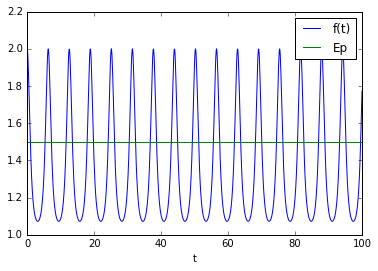

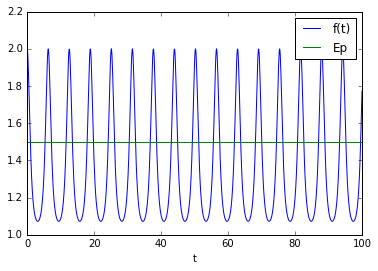

In [13]:
T = np.linspace(0, 100, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 100 años"

### Con una función de crecimiento población $r(t)=sin(t)$, se puede concluir que la población oscila al rededor de $k$, pero nunca converge.

## Segunda función  
### * $r(t)=cos(t)$

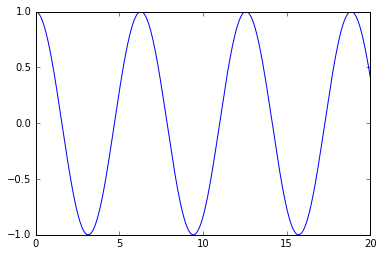

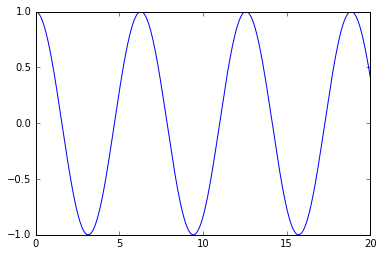

In [14]:
from sympy import *
t = symbols("t", real=True)
Sn = cos(t)
T = np.linspace(0, 20, 1000)
F = np.vectorize(lambda val: Sn.subs(t, val).evalf())
plt.plot(T, F(T))

In [15]:
from sympy import *
k = symbols("k", positive=True)
t = symbols("t", real=True)
x = Function("x", real=True)
r = Function("r", real=True)
eq = x(t).diff(t) - cos(t)*(1-x(t)/k)*x(t)
eq

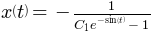

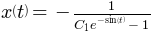

In [16]:
eq = eq.subs(k, 1)
sol = dsolve(eq,x(t))
sol

Si k=1, entonces C1 es
Si k=1, entonces C1 es


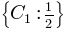

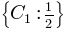

In [17]:
C1= symbols("C1")
const = solve([sol.rhs.subs(t,0) - 2], [C1])
print "Si k=1, entonces C1 es"
const

La ecuación final se puede definir como:
La ecuación final se puede definir como:


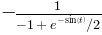

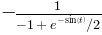

In [18]:
initvalue_solution = sol.rhs.subs(C1, const[C1])
print "La ecuación final se puede definir como:"
initvalue_solution

Analisis del comportamiento de población en un intervalo de 3.7 años
Analisis del comportamiento de población en un intervalo de 3.7 años


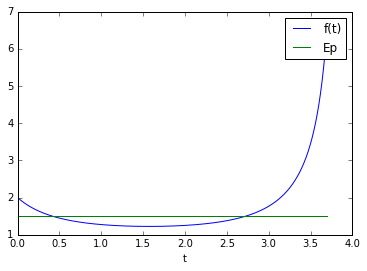

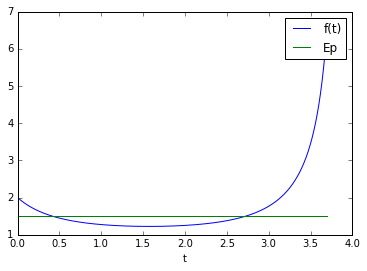

In [19]:
T = np.linspace(0, 3.7, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 3.7 años"

Analisis del comportamiento de población en un intervalo de 3.8 años
Analisis del comportamiento de población en un intervalo de 3.8 años


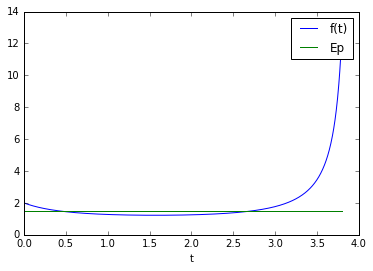

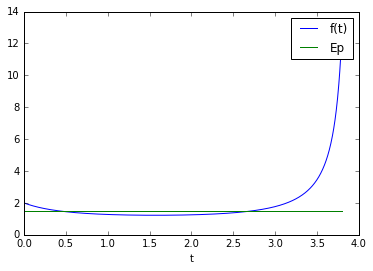

In [20]:
T = np.linspace(0, 3.8, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 3.8 años"

Analisis del comportamiento de población en un intervalo de 3.9 años
Analisis del comportamiento de población en un intervalo de 3.9 años


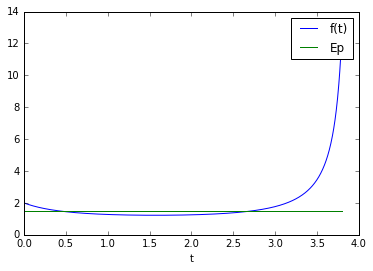

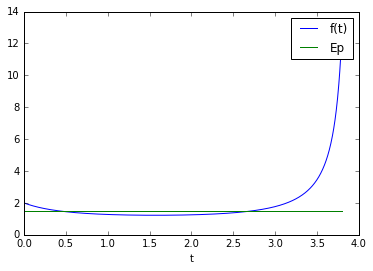

In [21]:
T = np.linspace(0, 3.8, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 3.9 años"

Analisis del comportamiento de población en un intervalo de 5 años
Analisis del comportamiento de población en un intervalo de 5 años


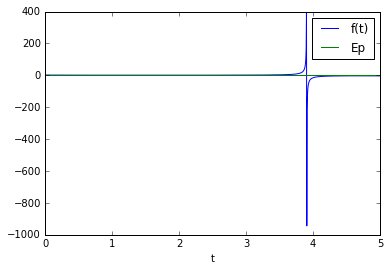

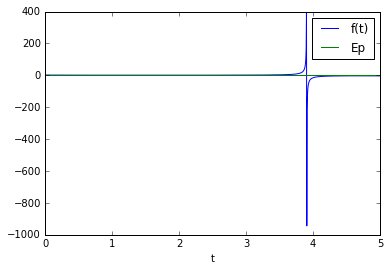

In [22]:
T = np.linspace(0, 5, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 5 años"

### Con una función de crecimiento población $r(t)=cos(t)$, se puede concluir que la población tiende a tener crecimiento muy acelerado hasta que colapsa.

# Tercera función  
### * $r(t)=\frac{sin(t)}{t}$

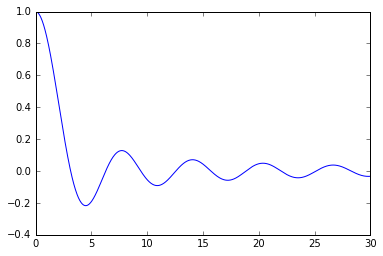

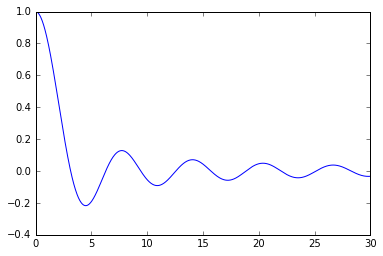

In [23]:
from sympy import *
t = symbols("t", real=True)
Sn = sin(t)/t
T = np.linspace(0, 30, 1000)
F = np.vectorize(lambda val: Sn.subs(t, val).evalf())
plt.plot(T, F(T))

In [24]:
from sympy import *
k = symbols("k", positive=True)
t = symbols("t", real=True)
x = Function("x", real=True)
r = Function("r", real=True)
eq = x(t).diff(t) - (sin(t)/t)*(1-x(t)/k)*x(t)
eq

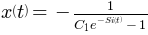

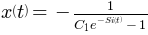

In [25]:
eq = eq.subs(k, 1)
sol = dsolve(eq,x(t))
sol

Si k=1, entonces C1 es
Si k=1, entonces C1 es


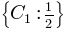

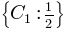

In [26]:
C1= symbols("C1")
const = solve([sol.rhs.subs(t,0) - 2], [C1])
print "Si k=1, entonces C1 es"
const

La ecuación final se puede definir como:
La ecuación final se puede definir como:


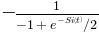

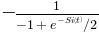

In [27]:
initvalue_solution = sol.rhs.subs(C1, const[C1])
print "La ecuación final se puede definir como:"
initvalue_solution

Analisis del comportamiento de población en un intervalo de 10 años
Analisis del comportamiento de población en un intervalo de 10 años


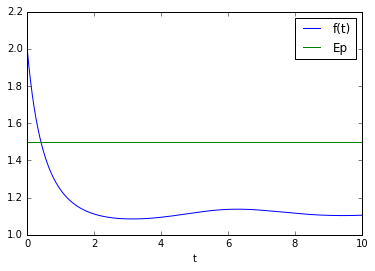

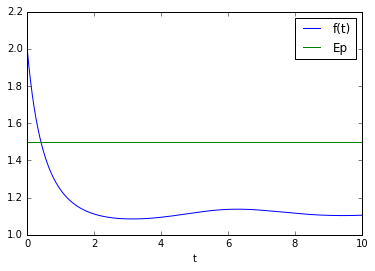

In [28]:
T = np.linspace(0, 10, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 10 años"

Analisis del comportamiento de población en un intervalo de 50 años
Analisis del comportamiento de población en un intervalo de 50 años


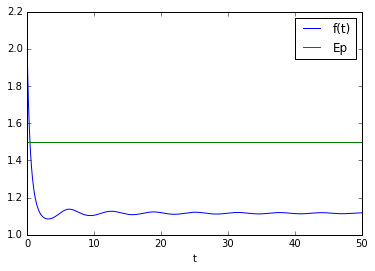

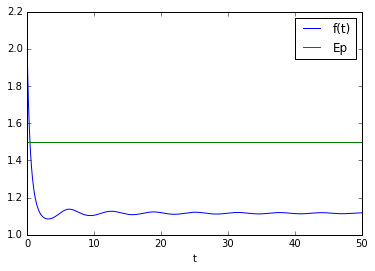

In [29]:
T = np.linspace(0, 50, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 50 años"

Analisis del comportamiento de población en un intervalo de 100 años
Analisis del comportamiento de población en un intervalo de 100 años


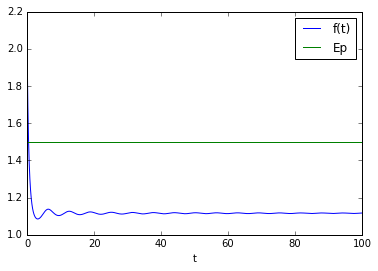

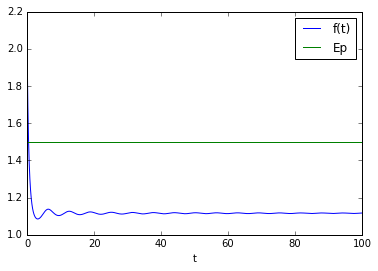

In [30]:
T = np.linspace(0, 100, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 100 años"

### Con una función de crecimiento población $r(t)=\frac{sin(t)}{t}$, se puede concluir que la población tiende a tener decrecimiento acelerado hasta estabilizarse.

# Cuarta función  
### * $r(t)=tcos(t) - t^2sin(t)$

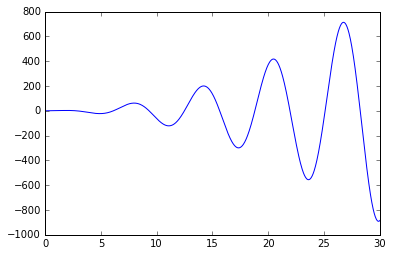

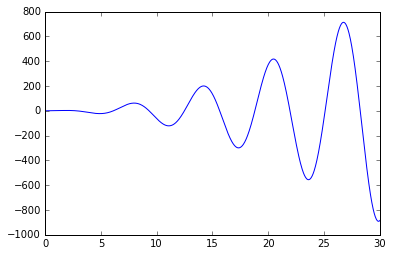

In [31]:
from sympy import *
t = symbols("t", real=True)
Sn = t*cos(t) + t**2*sin(t)
T = np.linspace(0, 30, 1000)
F = np.vectorize(lambda val: Sn.subs(t, val).evalf())
plt.plot(T, F(T))

In [32]:
from sympy import *
k = symbols("k", positive=True)
t = symbols("t", real=True)
x = Function("x", real=True)
r = Function("r", real=True)
eq = x(t).diff(t) - (t*cos(t) + t**2*sin(t))*(1-x(t)/k)*x(t)
eq

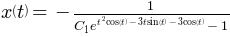

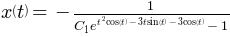

In [33]:
eq = eq.subs(k, 1)
sol = dsolve(eq,x(t))
sol

In [34]:
C1= symbols("C1")
const = solve([sol.rhs.subs(t,0) - 2], [C1])
print "Si k=1, entonces C1 es"
const

Si k=1, entonces C1 es
Si k=1, entonces C1 es


La ecuación final se puede definir como:
La ecuación final se puede definir como:


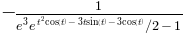

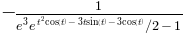

In [35]:
initvalue_solution = sol.rhs.subs(C1, const[C1])
print "La ecuación final se puede definir como:"
initvalue_solution

Analisis del comportamiento de población en un intervalo de 3 años
Analisis del comportamiento de población en un intervalo de 3 años


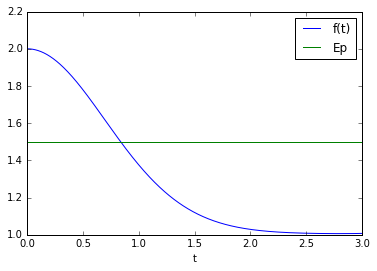

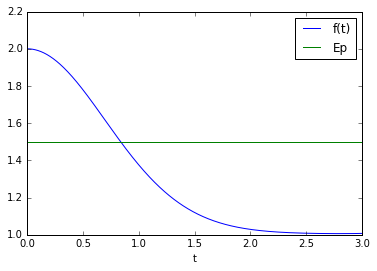

In [36]:
T = np.linspace(0, 3, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 3 años"

Analisis del comportamiento de población en un intervalo de 3.5 años
Analisis del comportamiento de población en un intervalo de 3.5 años


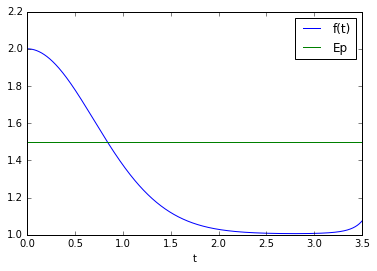

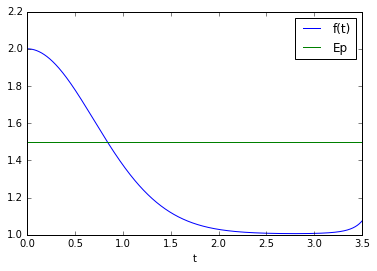

In [37]:
T = np.linspace(0, 3.5, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 3.5 años"

Analisis del comportamiento de población en un intervalo de 3.7 años
Analisis del comportamiento de población en un intervalo de 3.7 años


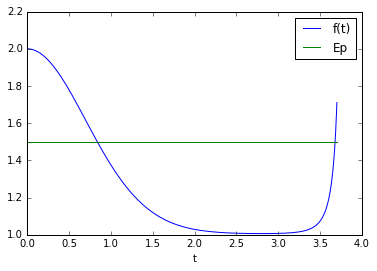

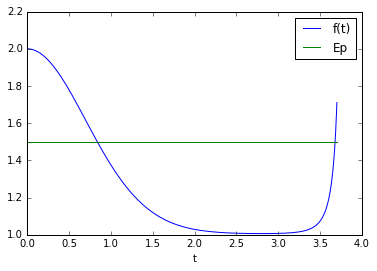

In [38]:
T = np.linspace(0, 3.7, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 3.7 años"

Analisis del comportamiento de población en un intervalo de 3.5 años
Analisis del comportamiento de población en un intervalo de 3.5 años


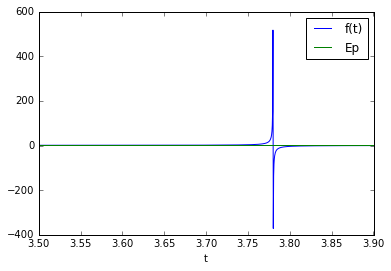

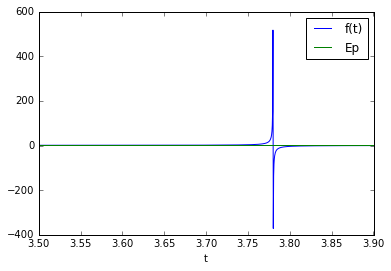

In [39]:
T = np.linspace(3.5, 3.9, 1000)
U = np.ones([1000])*1.5
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, U)
plt.legend(("f(t)", "Ep"))
plt.xlabel("t")
print "Analisis del comportamiento de población en un intervalo de 3.5 años"

### Con una función de crecimiento población $r(t)=tcos(t) - t^2sin(t)$, se puede concluir que la población tiende a tener crecimiento acelerado hasta colapsar.

# Para analizar con mayor detalle el comportamiento de las poblaciones, crearemos 4 videos con diferentes cambios poblacionales en el tiempo. 

## Primer video
### * Funcion $r(t)=sin(t)$

In [68]:
def solve_do(k0,init_pos):
    k = symbols("k", positive=True)
    t = symbols("t", real=True)
    x = Function("x", real=True)
    r = Function("r", real=True)
    eq = x(t).diff(t) - sin(t)*(1-x(t)/k)*x(t)
    eq = eq.subs(k, k0)
    sol = dsolve(eq,x(t))
    C1= symbols("C1")
    const = solve([sol.rhs.subs(t,0) - init_pos], [C1])
    initvalue_solution = sol.rhs.subs(C1, const[C1])
    F = lambdify(t, initvalue_solution, "numpy")
    
    return F

In [154]:
def generate_animation(fname, params1, params2, t_max=400, x_range=(0,10)):
    global points1, points2,  c
    
    omega1    = params1["k"]
    init_pos1 = params1["init_pos"]

    
    omega2    = params2["k"]
    init_pos2 = params2["init_pos"]

    F1 = solve_do(omega1, init_pos1)
    F2 = solve_do(omega2, init_pos2)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(111)
    
    s1_main   = plt.scatter(0, F1(0), color="red", alpha=0.5, s=100)
    s1_points = plt.scatter([], [] , color="blue", alpha=0.5, s=20)
    s2_main   = plt.scatter(0, F2(0), color="black", alpha=0.5, s=100)
    s2_points = plt.scatter([], [] , color="white", alpha=0.5, s=20)
    text     = ax.text (x_range[0]+(x_range[1]-x_range[0])/2,.55, "$t=0 secstou", size=10)#str(sats[i]), size=8)

    text1     = ax.text (x_range[0]+.2,-.4, "K=%.2f"%omega1)#str(sats[i]), size=8)
    text2     = ax.text (x_range[0]+4,-.4, "K=%.2f"%omega2)#str(sats[i]), size=8)

    
    plt.xlim(x_range[0],x_range[1])
    plt.ylim(0,3)

    points1 = []
    points2 = []

    c=1
    print "frame number:",
    def update(time):
        global points1, points2, c;  
        if c%10==0: print c, 
        sys.stdout.flush(); c+=1    

        x1_pos = F1(time)
        x2_pos = F2(time)

        points1.append(x1_pos)
        points1 = points1[-1:]
        s1_main.set_offsets([[time, x1_pos ]])
        s1_points.set_offsets(np.vstack((time*np.ones(len(points1)), points1)).T)

        points2.append(x2_pos)
        points2 = points2[-1:]
        s2_main.set_offsets([[time, x2_pos ]])
        s2_points.set_offsets(np.vstack((time*np.ones(len(points2)), points2)).T)
        
        
        text.set_text("$t=%6.2f years$"%time)
    plt.close(fig)
    anim = animation.FuncAnimation(fig, update, np.arange(t_max)*1./10) #len(dtimes.keys()))
    anim.save(fname, writer="ffmpeg", fps=20, bitrate=1800)

In [155]:
params1 = { "k": 1, "init_pos": 2 }
params2 = { "k": 2, "init_pos": 2 }

generate_animation("/home/user/share/Seno.mp4", params1, params2, t_max=200, x_range=(0,20))

frame number:frame number: 10 10 20 20 30 30 40 40 50 50 60 60 70 70 80 80 90 90 100 100 110 110 120 120 130 130 140 140 150 150 160 160 170 170 180 180 190 190 200 200



## Segundo video
### * Funcion $r(t)=cos(t)$

In [166]:
def solve_do(k0,init_pos):
    k = symbols("k", positive=True)
    t = symbols("t", real=True)
    x = Function("x", real=True)
    r = Function("r", real=True)
    eq = x(t).diff(t) - cos(t)*(1-x(t)/k)*x(t)
    eq = eq.subs(k, k0)
    sol = dsolve(eq,x(t))
    C1= symbols("C1")
    const = solve([sol.rhs.subs(t,0) - init_pos], [C1])
    initvalue_solution = sol.rhs.subs(C1, const[C1])
    F = lambdify(t, initvalue_solution, "numpy")
    
    return F

In [167]:
def generate_animation(fname, params1, params2, t_max=400, x_range=(0,4)):
    global points1, points2,  c
    
    omega1    = params1["k"]
    init_pos1 = params1["init_pos"]

    
    omega2    = params2["k"]
    init_pos2 = params2["init_pos"]

    F1 = solve_do(omega1, init_pos1)
    F2 = solve_do(omega2, init_pos2)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(111)
    
    s1_main   = plt.scatter(0, F1(0), color="red", alpha=0.5, s=100)
    s1_points = plt.scatter([], [] , color="blue", alpha=0.5, s=20)
    s2_main   = plt.scatter(0, F2(0), color="black", alpha=0.5, s=100)
    s2_points = plt.scatter([], [] , color="white", alpha=0.5, s=20)
    text     = ax.text (x_range[0]+(x_range[1]-x_range[0])/2,.55, "$t=0 secstou", size=10)#str(sats[i]), size=8)

    text1     = ax.text (x_range[0]+.2,-.4, "K=%.2f"%omega1)#str(sats[i]), size=8)
    text2     = ax.text (x_range[0]+4,-.4, "K=%.2f"%omega2)#str(sats[i]), size=8)

    
    plt.xlim(x_range[0],x_range[1])
    plt.ylim(0,3)

    points1 = []
    points2 = []

    c=1
    print "frame number:",
    def update(time):
        global points1, points2, c;  
        if c%10==0: print c, 
        sys.stdout.flush(); c+=1    

        x1_pos = F1(time)
        x2_pos = F2(time)

        points1.append(x1_pos)
        points1 = points1[-1:]
        s1_main.set_offsets([[time, x1_pos ]])
        s1_points.set_offsets(np.vstack((time*np.ones(len(points1)), points1)).T)

        points2.append(x2_pos)
        points2 = points2[-1:]
        s2_main.set_offsets([[time, x2_pos ]])
        s2_points.set_offsets(np.vstack((time*np.ones(len(points2)), points2)).T)
        
        
        text.set_text("$t=%6.2f years$"%time)
    plt.close(fig)
    anim = animation.FuncAnimation(fig, update, np.arange(t_max)*1./10) #len(dtimes.keys()))
    anim.save(fname, writer="ffmpeg", fps=20, bitrate=1800)

In [169]:
params1 = { "k": 1, "init_pos": 2 }
params2 = { "k": 2, "init_pos": 2 }

generate_animation("/home/user/share/Cos.mp4", params1, params2, t_max=200, x_range=(0,4))

frame number:frame number: 10 10 20 20 30 30 40 40 50 50 60 60 70 70 80 80 90 90 100 100 110 110 120 120 130 130 140 140 150 150 160 160 170 170 180 180 190 190 200 200



# Tercer Video
### * Función $r(t)=tcos(t) - t^2sin(t)$

In [185]:
def solve_do(k0,init_pos):
    k = symbols("k", positive=True)
    t = symbols("t", real=True)
    x = Function("x", real=True)
    r = Function("r", real=True)
    eq = x(t).diff(t) - (t*cos(t)-t**2*sin(t))*(1-x(t)/k)*x(t)
    eq = eq.subs(k, k0)
    sol = dsolve(eq,x(t))
    C1= symbols("C1")
    const = solve([sol.rhs.subs(t,0) - init_pos], [C1])
    initvalue_solution = sol.rhs.subs(C1, const[C1])
    F = lambdify(t, initvalue_solution, "numpy")
    
    return F

In [201]:
def generate_animation(fname, params1, params2, t_max=400, x_range=(-5,4)):
    global points1, points2,  c
    
    omega1    = params1["k"]
    init_pos1 = params1["init_pos"]

    
    omega2    = params2["k"]
    init_pos2 = params2["init_pos"]

    F1 = solve_do(omega1, init_pos1)
    F2 = solve_do(omega2, init_pos2)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(111)
    
    s1_main   = plt.scatter(0, F1(0), color="red", alpha=0.5, s=100)
    s1_points = plt.scatter([], [] , color="blue", alpha=0.5, s=20)
    s2_main   = plt.scatter(0, F2(0), color="black", alpha=0.5, s=100)
    s2_points = plt.scatter([], [] , color="white", alpha=0.5, s=20)
    text     = ax.text (x_range[0]+(x_range[1]-x_range[0])/2,.55, "$t=0 secstou", size=10)#str(sats[i]), size=8)

    text1     = ax.text (x_range[0]+.2,-.4, "K=%.2f"%omega1)#str(sats[i]), size=8)
    text2     = ax.text (x_range[0]+4,-.4, "K=%.2f"%omega2)#str(sats[i]), size=8)

    
    plt.xlim(x_range[0],x_range[1])
    plt.ylim(0,4)

    points1 = []
    points2 = []

    c=1
    print "frame number:",
    def update(time):
        global points1, points2, c;  
        if c%10==0: print c, 
        sys.stdout.flush(); c+=1    

        x1_pos = F1(time)
        x2_pos = F2(time)

        points1.append(x1_pos)
        points1 = points1[-1:]
        s1_main.set_offsets([[time, x1_pos ]])
        s1_points.set_offsets(np.vstack((time*np.ones(len(points1)), points1)).T)

        points2.append(x2_pos)
        points2 = points2[-1:]
        s2_main.set_offsets([[time, x2_pos ]])
        s2_points.set_offsets(np.vstack((time*np.ones(len(points2)), points2)).T)
        
        
        text.set_text("$t=%6.2f years$"%time)
    plt.close(fig)
    anim = animation.FuncAnimation(fig, update, np.arange(t_max)*1./10) #len(dtimes.keys()))
    anim.save(fname, writer="ffmpeg", fps=20, bitrate=600)

In [203]:
params1 = { "k": 1, "init_pos": 2 }
params2 = { "k": 2, "init_pos": 2 }

generate_animation("/home/user/share/tcos_tSin.mp4", params1, params2, t_max=200, x_range=(0,4))

frame number:frame number: 10 10 20 20 30 30 40 40 50 50 60 60 70 70 80 80 90 90 100 100 110 110 120 120 130 130 140 140 150 150 160 160 170 170 180 180 190 190 200 200

